In [34]:
import pandas as pd 
import numpy as np
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Cohort analyses 

There are 4 datasets that we are working with: 

In [2]:
assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/SEMI PROJECT VARIANT 2/assessments.csv')
#this file contains information about the grades in the test.
#Typically, each subject in a semester includes a series of graded tests, followed by a final examination test (exam).
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [3]:
courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/SEMI PROJECT VARIANT 2/courses.csv')
courses
#file contains a list of subjects by semester.

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [4]:
studentAssessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/SEMI PROJECT VARIANT 2/studentAssessment.csv')
studentAssessment
# this file contains student test scores. If a student does not submit work for assessment, the result is not recorded in the spreadsheet.

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [5]:
studentRegistration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/SEMI PROJECT VARIANT 2/studentRegistration.csv')
studentRegistration
#this file contains information about the time the student registered for the course in the semester.

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


# Aproach's description 


Often for the qualitative analysis of television networks, approaches based on segmentation are used. python, by built-in, hand-picked RFM clusters of students in order to qualitatively evaluate their audience. In a fitted clustering, you can choose possible metrics:

R - average time to pass one exam, F - completion, M - the average number of points received for the exam.

Describe in detail how you created the clusters. For each RFM-segment on the structure of the boundaries of the prescription, frequency and monetary circulation metrics for a combination of these clusters.

In [9]:
exams = (studentAssessment.merge(assessments, how='left', on = 'id_assessment')).query('assessment_type == "Exam"')
exams

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0


In [12]:
exams['if_passed'] = exams['score'].apply(lambda x: True if x >= 40 else False)

In [10]:
exams['id_student'].value_counts()

515046    2
554065    2
597365    2
676538    2
591230    2
         ..
410886    1
629725    1
656642    1
587008    1
573440    1
Name: id_student, Length: 4633, dtype: int64

In [13]:
students_RFM_data = exams.groupby('id_student', as_index=False) \
    .agg({'date_submitted':'mean','score':'mean', 'assessment_type':'count', 'if_passed':'sum'})
students_RFM_data['frequency'] = (students_RFM_data.if_passed * 100) / students_RFM_data.assessment_type

In [14]:
#in the end, we see that most of the students passed all exams, but there are those who passed only half or did not pass at all
students_RFM_data['frequency'].value_counts()

100.0    4069
0.0       536
50.0       28
Name: frequency, dtype: int64

In [15]:
students_RFM_data

,id_student,date_submitted,score,assessment_type,if_passed,frequency
0,23698,243.0,80.0,1,1,100.0
1,24213,236.0,58.0,1,1,100.0
2,27116,243.0,96.0,1,1,100.0
3,28046,237.0,40.0,1,1,100.0
4,28787,243.0,44.0,1,1,100.0
...,...,...,...,...,...,...
4628,2694886,236.0,69.0,1,1,100.0
4629,2694933,230.0,73.0,1,1,100.0
4630,2695608,237.0,73.0,1,1,100.0
4631,2697181,230.0,80.0,1,1,100.0


In [17]:
students_RFM_data.rename(columns={'date_submitted': 'Recency', 'frequency': 'Frequency', 'score':'Monetary'}, inplace=True)

In [18]:
students_RFM_data = students_RFM_data[['id_student', 'Recency', 'Monetary', 'Frequency']]
students_RFM_data.head()

,id_student,Recency,Monetary,Frequency
0,23698,243.0,80.0,100.0
1,24213,236.0,58.0,100.0
2,27116,243.0,96.0,100.0
3,28046,237.0,40.0,100.0
4,28787,243.0,44.0,100.0


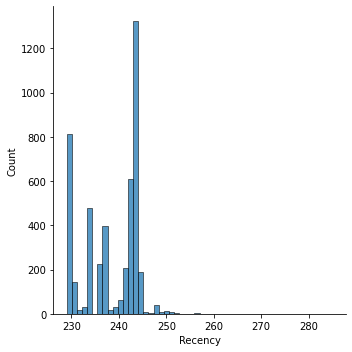

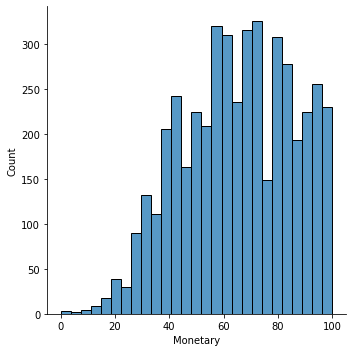

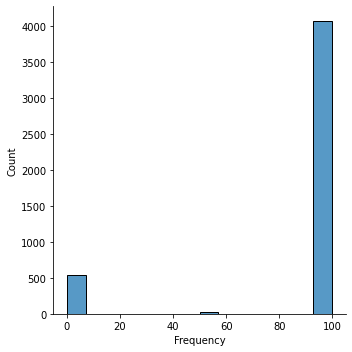

In [21]:
#distribution of indicators
sns.displot(data=students_RFM_data, x="Recency")
sns.displot(data=students_RFM_data, x="Monetary")
sns.displot(data=students_RFM_data, x="Frequency")

in the graphs above we see that Frequency is represented by three groups of values (0, 50 and 100),
however, the rest of the indicators are distributed differently. Define boundaries using quintiles

In [22]:
quintiles = students_RFM_data[['Recency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'Monetary': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0}}

Now we need to set groups for our students. IMPORTANT to consider: the more Recency, the worse the student showed himself logically
for Frequency and Monetary - vice versa

In [23]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['Monetary'][.2]:
        return 1
    elif x <= quintiles['Monetary'][.4]:
        return 2
    elif x <= quintiles['Monetary'][.6]:
        return 3
    elif x <= quintiles['Monetary'][.8]:
        return 4
    else:
        return 5    

def f_score(x):
    if x <= 0:
        return 1
    elif x <= 25:
        return 2
    elif x <= 50:
        return 3
    elif x <= 75:
        return 4
    else:
        return 5    

In [24]:
students_RFM_data['R'] = students_RFM_data['Recency'].apply(lambda x: r_score(x))
students_RFM_data['F'] = students_RFM_data['Frequency'].apply(lambda x: f_score(x))
students_RFM_data['M'] = students_RFM_data['Monetary'].apply(lambda x: m_score(x))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
students_RFM_data['RFM_Score'] = students_RFM_data['R'].map(str) + students_RFM_data['F'].map(str) + students_RFM_data['M'].map(str)
students_RFM_data.head()

,id_student,Recency,Monetary,Frequency,R,F,M,RFM_Score
0,23698,243.0,80.0,100.0,2,5,4,254
1,24213,236.0,58.0,100.0,4,5,2,452
2,27116,243.0,96.0,100.0,2,5,5,255
3,28046,237.0,40.0,100.0,4,5,1,451
4,28787,243.0,44.0,100.0,2,5,1,251


In [26]:
students_RFM_data.RFM_Score.value_counts()

155    266
454    250
452    241
453    239
552    234
455    218
354    210
352    209
252    182
353    180
554    167
152    162
553    160
555    152
153    151
355    147
154    134
254    134
511    133
255    128
253    127
111    117
411    113
551    108
311     93
151     86
211     80
451     75
351     65
251     44
332      8
431      6
331      5
232      3
432      2
532      2
231      1
531      1
Name: RFM_Score, dtype: int64

In [27]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

students_RFM_data['Segment'] = students_RFM_data['R'].map(str) + students_RFM_data['F'].map(str)
students_RFM_data['Segment'] = students_RFM_data['Segment'].replace(segt_map, regex=True)
students_RFM_data.head()

,id_student,Recency,Monetary,Frequency,R,F,M,RFM_Score,Segment
0,23698,243.0,80.0,100.0,2,5,4,254,can't loose
1,24213,236.0,58.0,100.0,4,5,2,452,loyal customers
2,27116,243.0,96.0,100.0,2,5,5,255,can't loose
3,28046,237.0,40.0,100.0,4,5,1,451,loyal customers
4,28787,243.0,44.0,100.0,2,5,1,251,can't loose


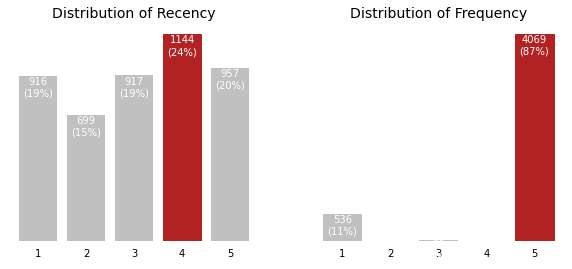

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = students_RFM_data[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

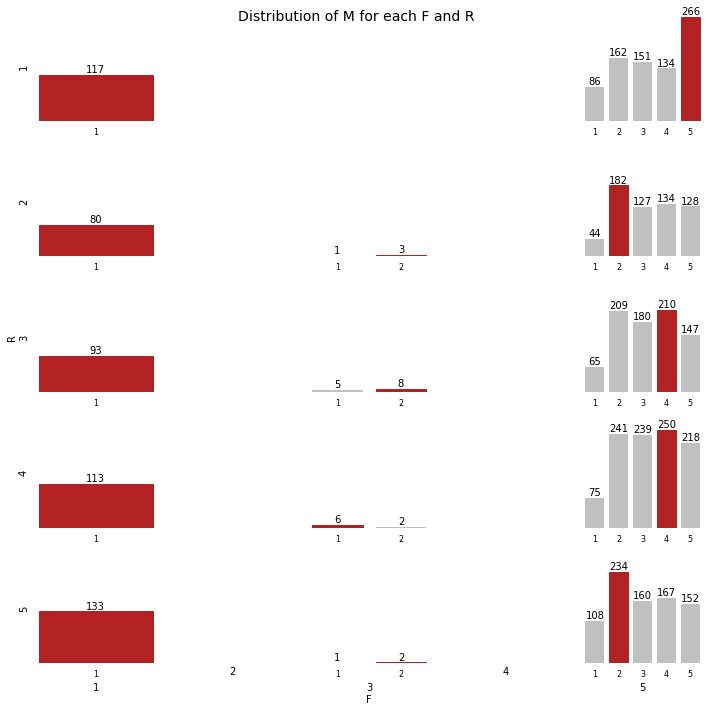

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = students_RFM_data[(students_RFM_data['R'] == r) & (students_RFM_data['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Thus, we see that the highest scores are for those students who closed courses on average later than the rest(
Lower results were shown by those who completed the course earlier

In [37]:
rfm = students_RFM_data.groupby(['R','F'], as_index=False).agg({'M':'mean'})
rfm

,R,F,M
0,1,1,1.000000
1,1,5,3.415519
2,2,1,1.000000
3,2,3,1.750000
4,2,5,3.195122
5,3,1,1.000000
6,3,3,1.615385
7,3,5,3.203453
8,4,1,1.000000
9,4,3,1.250000


In [38]:
for_chart = rfm.pivot(index='R', columns=['F'], values='M')
for_chart

F,1,3,5
R,,,
1,1.0,NaN,3.415519
2,1.0,1.750000,3.195122
3,1.0,1.615385,3.203453
4,1.0,1.250000,3.288368
5,1.0,1.666667,3.025579


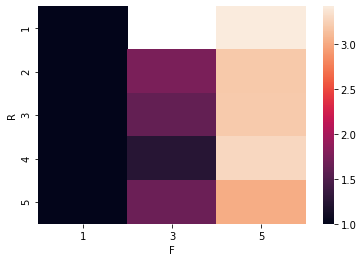

In [39]:
sns.heatmap(for_chart)